數據摘要：
          Timestamp  BPM  Signal            Status
0  2024/12/11 20:37  109     516  Fatigue Detected
1  2024/12/11 20:48  109     521  Fatigue Detected
2  2024/12/11 20:48  109     525  Fatigue Detected
3  2024/12/11 21:03  109     522  Fatigue Detected
4  2024/12/11 21:05  109     516  Fatigue Detected

疲勞比例: 3%
非疲勞比例: 97%
判定狀態: 正常狀態

分類報告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00        25

    accuracy                           1.00       639
   macro avg       1.00      1.00      1.00       639
weighted avg       1.00      1.00      1.00       639

模型準確率：1.00


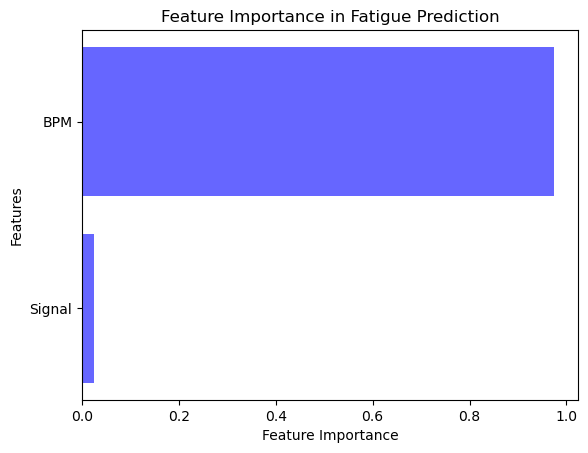

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 加載數據
data_path = 'cleaned_data2.0.csv'  # 確保文件位於當前工作目錄中
data = pd.read_csv(data_path)

# 確認數據結構
print("數據摘要：")
print(data.head())

# 添加疲勞標籤 (Fatigue: 0 - Normal, 1 - Fatigue)
data['Fatigue'] = data['BPM'].apply(lambda bpm: 1 if bpm > 100 or bpm < 60 else 0)

# 計算疲勞和非疲勞的比例
fatigue_count = data['Fatigue'].value_counts()
fatigue_ratio = fatigue_count.get(1, 0) / len(data) * 100  # 疲勞比例 (%)
non_fatigue_ratio = fatigue_count.get(0, 0) / len(data) * 100  # 非疲勞比例 (%)

# 判斷狀態
if fatigue_count.get(1, 0) < fatigue_count.get(0, 0) and fatigue_ratio <= 60 :
    status = "正常狀態"
else:
    status = "異常狀態"

# 打印比例和判定狀態
print(f"\n疲勞比例: {fatigue_ratio:.0f}%")
print(f"非疲勞比例: {non_fatigue_ratio:.0f}%")
print(f"判定狀態: {status}")

# 準備特徵和目標
X = data[['Signal', 'BPM']]
y = data['Fatigue']

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練模型
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 測試集預測
y_pred = model.predict(X_test)

# 評估模型表現
print("\n分類報告：")
print(classification_report(y_test, y_pred))
print(f"模型準確率：{accuracy_score(y_test, y_pred):.2f}")

# 可視化特徵重要性
feature_importances = model.feature_importances_
plt.barh(['Signal', 'BPM'], feature_importances, color='blue', alpha=0.6)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Fatigue Prediction')
plt.show()


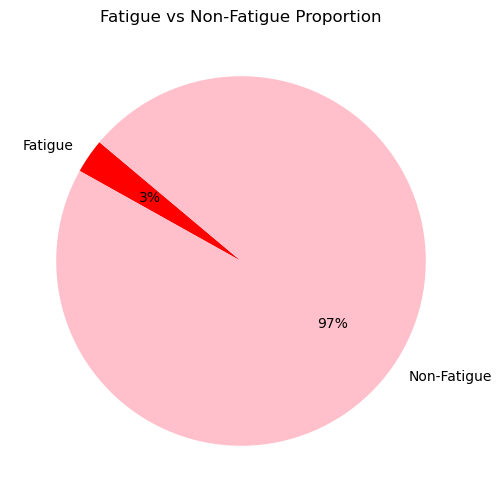

In [9]:
# 可視化疲勞與非疲勞的比例
plt.figure(figsize=(8, 6))
plt.pie([fatigue_ratio, non_fatigue_ratio], labels=['Fatigue', 'Non-Fatigue'], autopct='%1.0f%%', startangle=140, colors=['red', 'pink'])
plt.title('Fatigue vs Non-Fatigue Proportion')
plt.show()